In [2]:
import numpy as np
import pandas as pd
import sys
from scipy.special import comb
import matplotlib.pyplot as plt
NBA_YEARS = range(1950, 2021)
MLB_YEARS = range (1903,2019)

In [3]:
def generate_collapse_scores_by_year(league, year, flat=True):
    df = pd.read_csv("data/" + league + "/" + str(year) + ".csv")
    
    season = {}
    
    for index, row in df.iterrows():
        home_team = row["home_team"]
        away_team = row["away_team"]
        home_win = row["home_team_score"] > row["away_team_score"]
               
        season[home_team] = np.append(season.get(home_team, np.array([])), home_win)
        season[away_team] = np.append(season.get(away_team, np.array([])), not home_win)
        
    # remove playoffs by finding minimum games played and only retaining those    
    
    regular_season_length = sys.maxsize
    
    for team in season:
        num_team_games = len(season[team])
        if num_team_games < regular_season_length:
            regular_season_length = num_team_games
            
    for team in season:
        season[team] = season[team][:regular_season_length]
        
    season_end_length = 10 if flat else round(regular_season_length / 2)
        
    # calculate collapse scores    
        
    collapse_scores = {}
    
    for team in season:
        games = season[team]
        
        win_pct = np.sum(games) / len(games)
        season_end_wins = int(np.sum(games[-season_end_length:]))
        
        probability = 0
        
        for wins in range(0, season_end_wins + 1):
            temp = comb(season_end_length, wins) * win_pct ** wins * (1 - win_pct) ** (season_end_length - wins)
            probability += temp
            
        collapse_scores[team] = 1 / probability
        
    return collapse_scores

def generate_collapse_scores(league, years):
    collapse_scores = {}
    team_years = {}
    
    for year in years:
        year_collapse_scores = generate_collapse_scores_by_year(league, year)
        
        for team in year_collapse_scores:
            collapse_scores[team] = np.append(collapse_scores.get(team, np.array([])), year_collapse_scores[team])
            team_years[team] = np.append(team_years.get(team, np.array([])), year)
            
    return collapse_scores, team_years

In [6]:
nba_collapse_scores, nba_team_years = generate_collapse_scores("nba", NBA_YEARS)
mlb_collapse_scores, mlb_team_years = generate_collapse_scores("mlb", MLB_YEARS)

[(1.6417863454435913, 1953.0), (1.662889361417327, 1962.0), (1.7933830383683877, 1969.0), (1.8691929512568268, 1952.0), (2.016966251356759, 1951.0), (2.0522577775948294, 2008.0), (2.1179648230224353, 2002.0), (2.1473052656347393, 1958.0), (2.184064926325361, 1987.0), (2.219116900502618, 1959.0), (2.249444805247516, 1988.0), (2.259675264362803, 1986.0), (2.3559345250521004, 1982.0), (2.385044967048686, 1974.0), (2.4164358656451776, 2003.0), (2.4359850761256077, 1956.0), (2.4365055520792374, 1990.0), (2.4803403163613416, 1996.0), (2.593712699581609, 1998.0), (2.5975163489435, 2019.0), (2.6156415794602315, 1991.0), (2.620202173955577, 1957.0), (2.6268048596665583, 1980.0), (2.667768348108654, 1981.0), (2.678102329625069, 1997.0), (2.6840408618948586, 1976.0), (2.687658419431911, 2009.0), (2.6946223935596283, 1992.0), (2.7324514720372233, 1984.0), (2.7337783905391744, 2018.0), (2.7711462207668562, 2001.0), (2.8310880273201464, 2006.0), (2.861704067368, 1966.0), (2.8713677471382986, 2017.0)

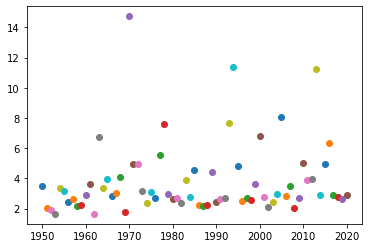

In [8]:
#average collapse score over time in NBA
def print_over_time(collapse_scores, team_years):
    yearDict={}
    for i in zip(collapse_scores, team_years):
        for x in zip(collapse_scores[i[0]],team_years[i[0]]):
            if(x[1] not in yearDict):
                yearDict[x[1]]=[x[0]]
            else:
                yearDict[x[1]].append(x[0])
    avgYearDict={}
    for x in yearDict:
        avgYearDict[x]=sum(yearDict[x])/len(yearDict[x])
    sort=(sorted(list(avgYearDict.values())))
    sortedList=[]
    for i in sort:
        sortedList.append((i,list(avgYearDict.keys())[list(avgYearDict.values()).index(i)]))
    for i in zip(avgYearDict.keys(),avgYearDict.values()):
        plt.scatter(i[0],i[1])
    print(sortedList)
    
    
print_over_time(nba_collapse_scores, nba_team_years)    
    

[(1.7773192531909214, 1922.0), (1.8686870760627996, 1967.0), (2.0122841081273672, 1954.0), (2.020330174217374, 2005.0), (2.02833747503082, 1983.0), (2.033592738314243, 1973.0), (2.0369550470104154, 1947.0), (2.053400507737811, 1949.0), (2.1016407474113348, 1920.0), (2.126366364826118, 2003.0), (2.2568553054917473, 1946.0), (2.296152168186245, 1961.0), (2.297871757251373, 1918.0), (2.308500708451123, 1992.0), (2.3252297537279785, 1903.0), (2.3261110464266928, 1991.0), (2.327281335455287, 1990.0), (2.331856581380131, 1982.0), (2.384706543702333, 1977.0), (2.3850068289310506, 1997.0), (2.436757977570265, 1906.0), (2.4651115312618206, 1989.0), (2.4843296392976884, 1994.0), (2.493070584107137, 1974.0), (2.513722904329424, 1979.0), (2.554474921116164, 1905.0), (2.5623926726934303, 1981.0), (2.5636848686129863, 1928.0), (2.598381399693232, 1912.0), (2.6258443940569776, 2007.0), (2.6344884373113584, 1925.0), (2.6374048308957483, 1950.0), (2.676140915301921, 1971.0), (2.6777572464077553, 1985.0

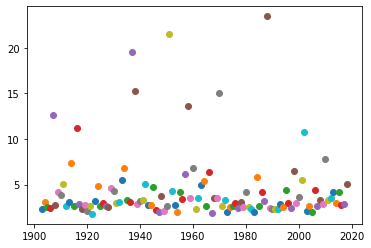

In [9]:
print_over_time(mlb_collapse_scores, mlb_team_years)

In [10]:
def team_average_collapse_scores(collapse_scores):
    means = {}
    stds = {}
    
    for team in collapse_scores:
        scores = collapse_scores[team]
        means[team] = np.mean(scores)
        stds[team] = np.std(scores)
        
    return means, stds

team_average_collapse_scores(nba_collapse_scores)

({'TRI-CITIES BLACKHAWKS': 1.1329317398497492,
  'DENVER NUGGETS': 2.194892981728886,
  'CHICAGO STAGS': 11.614623614885648,
  'NEW YORK KNICKS': 5.83466058175013,
  'INDIANAPOLIS OLYMPIANS': 1.5651562886407926,
  'ROCHESTER ROYALS': 1.693402370267168,
  'SHEBOYGAN RED SKINS': 1.9971760938299257,
  'ST. LOUIS BOMBERS': 14.948002153394404,
  'PHILADELPHIA WARRIORS': 2.6235500602076347,
  'MINNEAPOLIS LAKERS': 2.2746429148420053,
  'WATERLOO HAWKS': 1.012163690722907,
  'WASHINGTON CAPITOLS': 2.185047663237088,
  'BALTIMORE BULLETS': 3.1621295730580554,
  'ANDERSON PACKERS': 1.0465074852919583,
  'FORT WAYNE PISTONS': 4.353558099536536,
  'BOSTON CELTICS': 3.0636337149629247,
  'SYRACUSE NATIONALS': 2.9558239700047824,
  'MILWAUKEE HAWKS': 1.4293381668775325,
  'ST. LOUIS HAWKS': 1.839461870596799,
  'DETROIT PISTONS': 2.743336001517341,
  'CINCINNATI ROYALS': 1.9690463083349665,
  'LOS ANGELES LAKERS': 7.396742505055651,
  'CHICAGO PACKERS': 1.6623002114311103,
  'CHICAGO ZEPHYRS': 1.20

In [26]:
def plot_histogram(collapse_scores):
    hist_array = np.array([])
    
    for team in collapse_scores:
        hist_array = np.append(hist_array, collapse_scores[team])
        
    plt.hist(np.log(hist_array), bins=50)



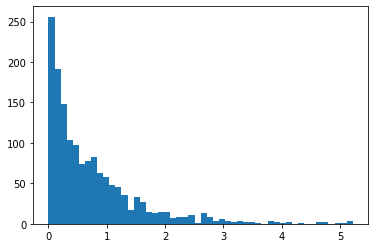

In [27]:
plot_histogram(nba_collapse_scores)

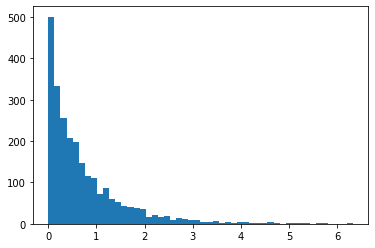

In [28]:
plot_histogram(mlb_collapse_scores)